<a href="https://colab.research.google.com/github/AlexisD29/Field-Mapping/blob/main/MLP_Regressor_Split(All_stations).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # that's the location your drive will be mounted

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
df_fxp = pd.read_hdf("/content/drive/My Drive/SULI/run3989to3990.h5", key='raw')


In [ ]:
conversion_element = 1e-9

In [ ]:

# Fitting Multi-layer Preceptron Regression to the dataset 
# import the regressor 

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import numpy as np
np.seterr(divide='ignore', invalid='ignore')

  


#slicing for the data used for the regression

#shape gives me the rows and columns of the dataframe and # of rows in this datframe is 14589
number_of_total_datapoints = df_fxp.shape[0]
start_index = 0
sliced_end_data = 200
sliced_offset = 30
total_gap = 300 # the trolley footprint gap in terms of seconds for 5 minutes(300s/300datapoints)
#We want to remove 1 min(60s) to be left with 2mins(120s) on both sides of data
number_of_orangepoints = 60
seconds_gap = 120
end_of_range = 700

#change start_index and sliced_end data




blue_times_slice = []
orange_times_slice = []
blue_frequencies_slice = []
orange_frequencies_slice = []
regression_list =[]
prediction_list = []
Blue_X_test_list = []

mean_difference = []
Orange_Y_test_list =[]
station = 0
stop = 72
step =93
for station in range(station,stop):
  print('station#', station)
  reg = MLPRegressor(random_state=42, max_iter=500)
  for end_index in range(0, number_of_total_datapoints - end_of_range, sliced_offset):
      
      blue_frequencies_slice.append(np.concatenate([df_fxp['st%i,m1'% station].values[end_index + start_index:end_index + sliced_end_data], df_fxp['st%i,m1'% station].values[total_gap+sliced_end_data+end_index:total_gap+end_index +start_index+(sliced_end_data)*2]]))
      
      orange_frequencies_slice.append(df_fxp['st%i,m1'% station].values[end_index +start_index+seconds_gap+sliced_end_data:end_index+start_index+seconds_gap+sliced_end_data+number_of_orangepoints])
      
      blue_times_slice.append(np.concatenate(([df_fxp['st%i,m1'% station].index.astype('i8').values[end_index + start_index:end_index + sliced_end_data], df_fxp['st%i,m1'% station].index.astype('i8').values[total_gap+sliced_end_data+end_index:total_gap+end_index +start_index+(sliced_end_data)*2]]))*conversion_element)
      
      orange_times_slice.append((df_fxp['st%i,m1'% station].index.astype('i8').values[end_index +start_index+seconds_gap+sliced_end_data:end_index+start_index+seconds_gap+sliced_end_data+number_of_orangepoints])*conversion_element)
      
      #print("For the blue_times_slices:",end_index+start_index,end_index + sliced_end_data,total_gap+sliced_end_data+end_index, end_index+start_index+total_gap + sliced_end_data*2)
      #print("For the orange_times_slices:",end_index+start_index+seconds_gap+sliced_end_data,end_index+start_index+seconds_gap+sliced_end_data+number_of_orangepoints)

  X = np.array(blue_frequencies_slice[station*step+0:station*step+step])
  Y = np.array(orange_frequencies_slice[station*step+0:station*step+step])
  Blue_X = X
  Orange_Y = Y

  Blue_X_train,Blue_X_test,Orange_Y_train,Orange_Y_test = train_test_split(Blue_X, Orange_Y,test_size=0.2,random_state = 42)
  reg.fit(Blue_X_train, Orange_Y_train)
  prediction= reg.predict(Blue_X_test)
  regression_list.append(reg)
  prediction_list.append(prediction)
  Orange_Y_test_list.append(Orange_Y_test)
  Blue_X_test_list.append(Blue_X_test)
  mean_difference.append((Orange_Y_test_list[station] - prediction_list[station]).mean())
  print(mean_difference)
  

X_times = np.array(blue_times_slice)
Y_times = np.array(orange_times_slice)

Blue_X_times = X_times
Orange_Y_times = Y_times


#train/test split data
Blue_X_times_train,Blue_X_times_test,Orange_Y_times_train,Orange_Y_times_test = train_test_split( Blue_X_times, Orange_Y_times,test_size=0.2,random_state = 42)
#reg.fit(Blue_X_times_train, Orange_Y_times_train)
      



station# 0
[34.19350612093282]
station# 1
[34.19350612093282, 33.74754149248138]
station# 2
[34.19350612093282, 33.74754149248138, 33.91689757309749]
station# 3
[34.19350612093282, 33.74754149248138, 33.91689757309749, 34.039503037587984]
station# 4
[34.19350612093282, 33.74754149248138, 33.91689757309749, 34.039503037587984, 33.28849515558977]
station# 5
[34.19350612093282, 33.74754149248138, 33.91689757309749, 34.039503037587984, 33.28849515558977, 29.410646868674558]
station# 6
[34.19350612093282, 33.74754149248138, 33.91689757309749, 34.039503037587984, 33.28849515558977, 29.410646868674558, 30.29605849043702]
station# 7
[34.19350612093282, 33.74754149248138, 33.91689757309749, 34.039503037587984, 33.28849515558977, 29.410646868674558, 30.29605849043702, 31.57249237031262]
station# 8
[34.19350612093282, 33.74754149248138, 33.91689757309749, 34.039503037587984, 33.28849515558977, 29.410646868674558, 30.29605849043702, 31.57249237031262, 32.56609725288891]
station# 9
[34.193506120932

In [ ]:
prediction_list[station]

array([[51795.00584525, 51388.81398228, 51561.36701463, ...,
        51423.36333204, 51284.02583209, 51559.41184993],
       [51797.31655642, 51385.85479768, 51560.31083283, ...,
        51421.42468487, 51283.27760174, 51561.11787568],
       [51797.83285258, 51386.5372724 , 51560.04586107, ...,
        51421.17024864, 51282.96615125, 51562.75457657],
       ...,
       [51796.50093736, 51389.8248613 , 51560.1500229 , ...,
        51422.00373146, 51281.80487836, 51559.8886002 ],
       [51797.46254941, 51387.88520825, 51559.7902051 , ...,
        51421.93719815, 51283.20407738, 51562.87401718],
       [51794.50121635, 51388.44443664, 51563.12418518, ...,
        51421.89832883, 51282.9079753 , 51558.57278758]])

In [ ]:
d = np.array(mean_difference)
print(round(d.mean(), 3))
c = np.array(mean_difference)
print(round(c.std(),3))


35.284
4.439


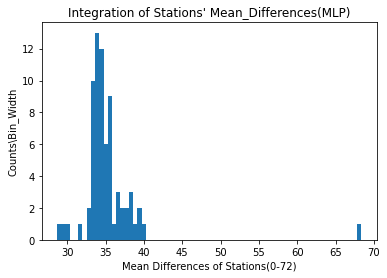

Mean of the Total Entries :  35.284 Hz
Standard Deviation of the Total Entries :  4.439 Hz


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
mu = 35.284 # mean of distribution
sigma = 4.439 # standard deviation of distribution


num_bins = 72

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(mean_difference, num_bins)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * round(sigma,3))) *
     np.exp(-0.5 * (1 / sigma * (bins - round(mu,3)))**2))
plt.xlabel('Mean Differences of Stations(0-72)')
plt.ylabel('Counts\Bin_Width')
plt.title("Integration of Stations' Mean_Differences(MLP)")
plt.show()

#a = stats.sem(mean_difference)
#print(a)
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Converted_OYT = np.array(Orange_Y_test_list)
Converted_prediction = np.array(prediction_list)
R2_score = r2_score(Converted_OYT.ravel(),Converted_prediction.ravel())

print("Mean of the Total Entries : ", round(mu,3),'Hz')
print("Standard Deviation of the Total Entries : ", round(sigma,3),'Hz')
#print('R^2 score is : ', round(R2_score,5),'Hz') #predict variation/true variation of the data(closer to 1 ,the better)

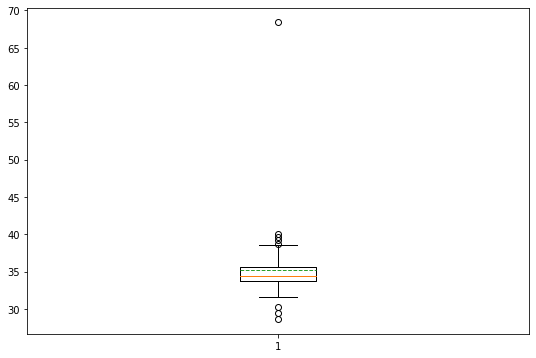

In [ ]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(mean_difference,showmeans=True,showcaps= True,meanline= True)
# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
